In [1]:
import sys
sys.path.append("../src")
import numpy as np
import pykep as pk
from pykep.core import lambert_problem, ic2par, epoch, DAY2SEC, AU, propagate_lagrangian, fb_prop

In [2]:
# Time epoch to consider
body1 = pk.planet.jpl_lp('earth')
body2 = pk.planet.jpl_lp('venus')
T_START = pk.epoch_from_string('2020-06-01 15:59:54.003')
mu_common = body1.mu_central_body
mu1 = body1.mu_self
mu2 = body2.mu_self

tof = 200

dV_list = np.flip(np.linspace(0.0, 400, 5))

## First, plot the ballsitc transfer trajectory using lambert

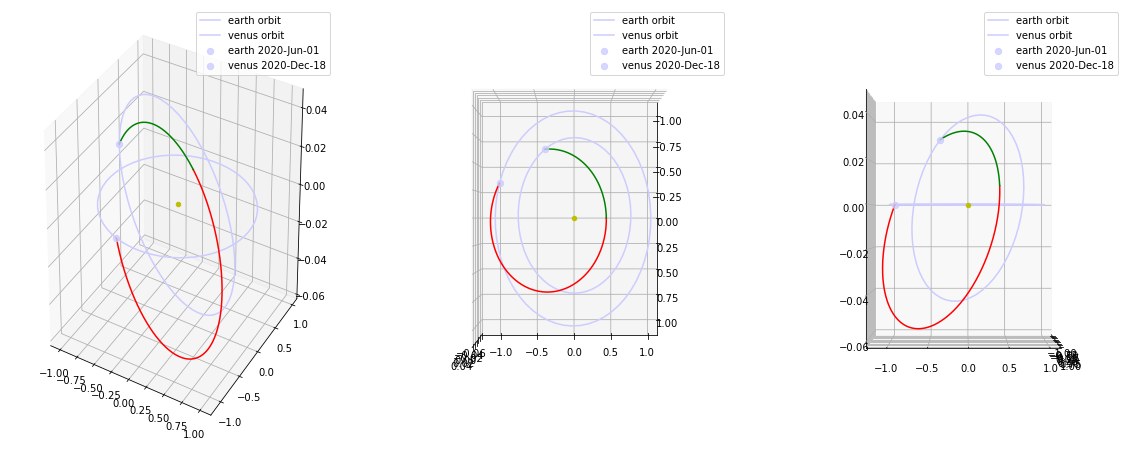

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from pykep.orbit_plots import plot_planet, plot_kepler

# plot lambert solution
t_P0 = epoch(T_START.mjd2000)
r_P0, V_P0 = body1.eph(t_P0)

t_Pf = epoch(T_START.mjd2000 + tof)
r_Pf, V_Pf = body2.eph(t_Pf)

lambert = lambert_problem(r_P0, r_Pf, tof*DAY2SEC, mu_common, False, 0)
v0_l = np.array(lambert.get_v1()[0])   # scaled
vf_l = np.array(lambert.get_v2()[0])

mpl.rcParams['legend.fontsize'] = 10

# Create the figure and axis
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter([0], [0], [0], color=['y'])

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter([0], [0], [0], color=['y'])
ax2.view_init(90, 0)

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter([0], [0], [0], color=['y'])
ax3.view_init(0,0)

for ax in [ax1, ax2, ax3]:
    # Plot the planet orbits
    plot_planet(body1, t0=t_P0, color=(0.8, 0.8, 1), legend=True, units=AU, axes=ax)
    plot_planet(body2, t0=t_Pf, color=(0.8, 0.8, 1), legend=True, units=AU, axes=ax)
    # Plot the Lambert solutions
    # axis = plot_lambert(lambert, color='b', legend=True, units=AU, axes=ax)
    tof_s = tof * DAY2SEC
    eta = 0.798
    plot_kepler(r_P0, v0_l, eta*tof_s, color='r', N=500, units=AU, mu=mu_common, axes=ax, label='arc1')
    plot_kepler(r_Pf, -vf_l, (1-eta)*tof_s, color='g', N=500, units=AU, mu=mu_common, axes=ax, label='arc2')

plt.show()

## Minimize V-inf (Apoapsis maneuver)
Objective type
- 1: Reduce V-infinity
- 2: Reduce TOF

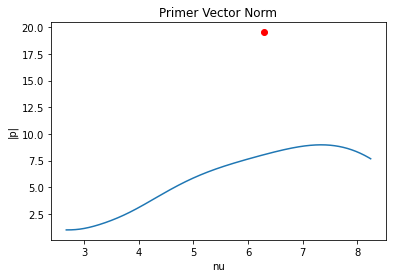

T_DV: 1.101054293204172
Primer Vector Direction (RTN):  [ 0.06667773 -0.99776207 -0.00499341]
theta_0m: 206.84  theta_0f: 319.18
DV: 400.00


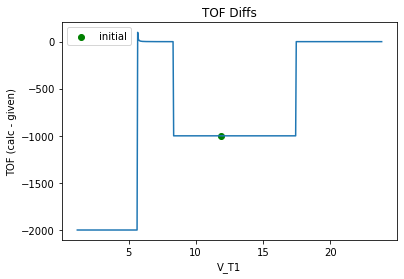

DV: 300.00


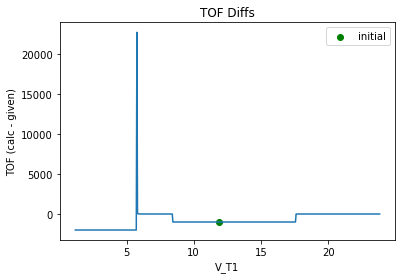

DV: 200.00


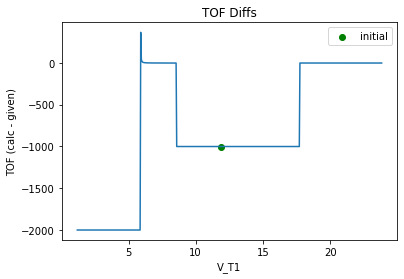

DV: 100.00


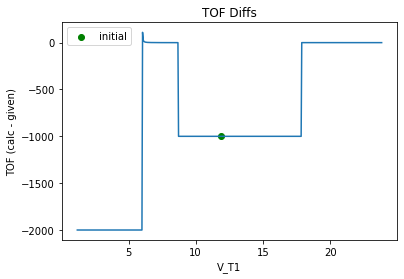

DV: 0.00


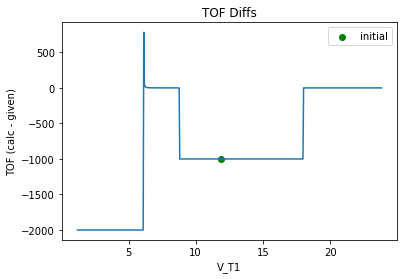

In [4]:
from maneuver_placement import solve_arc

succ, eta_store, V0_store, Vf_store, dum1, dum2, dum3 = solve_arc(body1, body2, T_START, tof, dV_list, mu_common, objective_type=1, debug=True)

## Next minimize orbital period after flyby

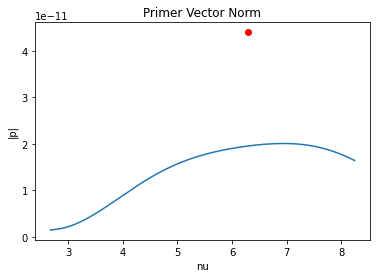

T_DV: 1.101054293204172
Primer Vector Direction (RTN):  [ 3.18500808e-02 -9.99492401e-01  7.16579663e-04]
theta_0m: 206.84  theta_0f: 319.18
DV: 400.00


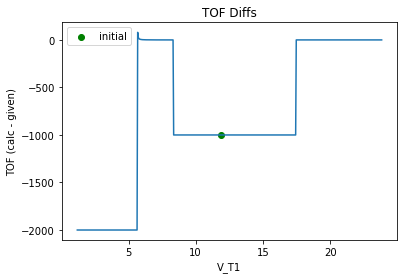

DV: 300.00


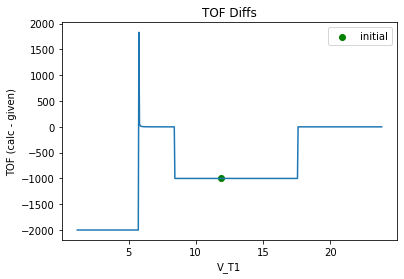

DV: 200.00


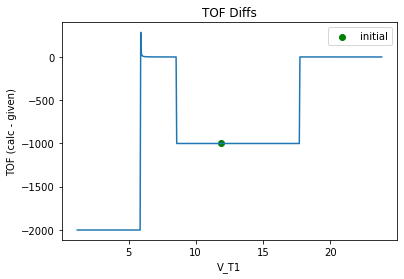

DV: 100.00


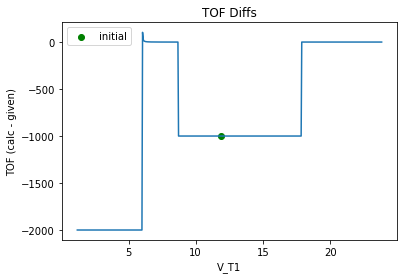

DV: 0.00


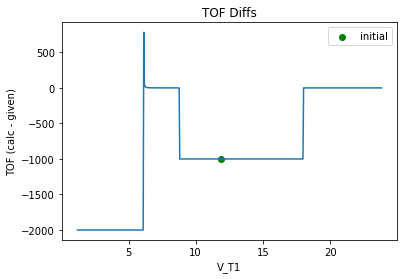

In [5]:
succ, eta_store, V0_store, Vf_store, _, _, _ = solve_arc(body1, body2, T_START, tof, dV_list, mu_common, objective_type=2, debug=True)